In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
iris = pd.read_csv("Downloads\iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
X = iris.drop(columns = ['Id']).iloc[:,:-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y = iris.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [8]:
iris.shape

(150, 6)

In [10]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [11]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
iris.values

array([[1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
iris.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [27]:
X = StandardScaler().fit_transform(X)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [33]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


In [41]:
cm1 = pd.DataFrame(data=cm, index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'verginica'])
cm1

,setosa,versicolor,verginica
setosa,15,0,0
versicolor,0,11,0
virginica,0,0,12


In [45]:
# output visualization
prediction_output = pd.DataFrame(data=[y_test, y_pred], index=['y_test', 'y_pred'])
prediction_output.transpose()

,y_test,y_pred
73,Iris-versicolor,NaN
18,Iris-setosa,Iris-versicolor
118,Iris-virginica,NaN
78,Iris-versicolor,NaN
76,Iris-versicolor,NaN
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,NaN
141,Iris-virginica,NaN
68,Iris-versicolor,NaN
82,Iris-versicolor,NaN


In [46]:
prediction_output.iloc[0,:].value_counts()

Iris-setosa        15
Iris-virginica     12
Iris-versicolor    11
Name: y_test, dtype: int64

In [47]:
# selecting the value of k
ks = 21
ans = np.zeros((ks-1))

for i in range(1, ks):
    classifier = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ans[i-1] = accuracy_score(y_test, y_pred)
ans

array([0.97368421, 0.97368421, 1.        , 0.97368421, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.97368421, 1.        , 1.        ])

In [49]:
print(f"The best accuracy was {max(ans)} with k = {ans.argmax()+1}")

The best accuracy was 1.0 with k = 3


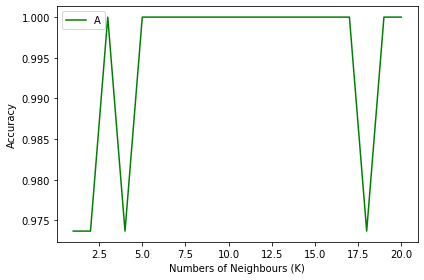

In [50]:
plt.plot(range(1, ks), ans, 'g')
plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Numbers of Neighbours (K)')
plt.tight_layout()
plt.show()